In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset('penguins')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna().to_numpy()
y = penguins['species'].dropna().to_numpy()

In [16]:
X_scaled = StandardScaler().fit_transform(X)

In [17]:
pca = PCA()
pca.fit(X_scaled)

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA Explained Variance Ratio: [0.68843878 0.19312919 0.09130898 0.02712305]


In [18]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var}")

per_var = [68.84 19.31  9.13  2.71]


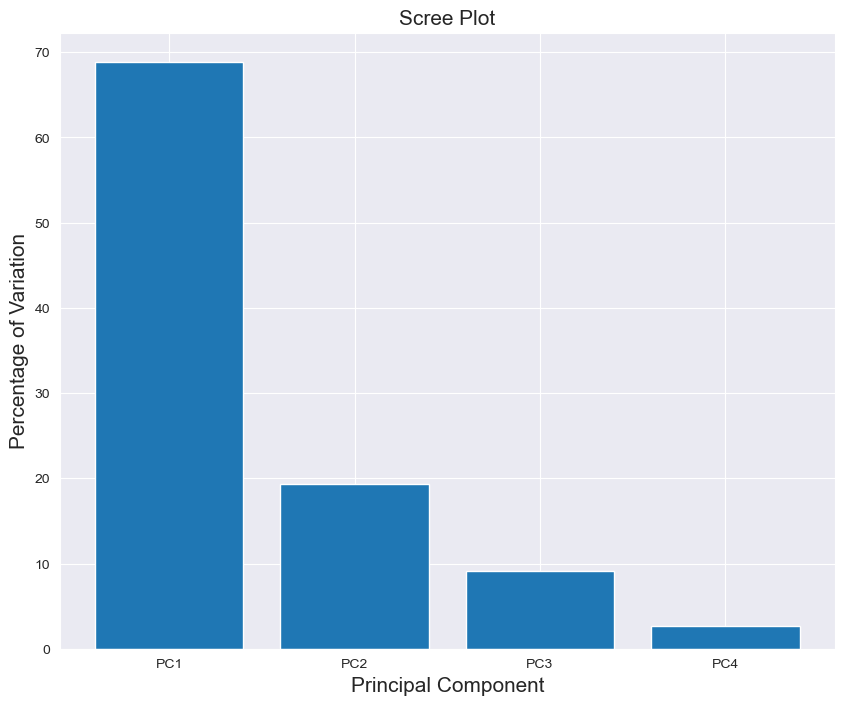

In [19]:
labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [20]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
bill_length_mm,0.455250,-0.400335,0.576013,0.548350
bill_depth_mm,0.597031,0.797767,0.002282,0.084363
flipper_length_mm,0.644301,-0.418427,-0.232084,-0.596600
body_mass_g,0.145523,-0.167986,-0.783799,0.579882


In [ ]:
pca_data = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_data, columns = labels)
pca_df